In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import solve_ivp

# Cinética de Procesos (Sesión 02)

<img src="figures/LogoCinvestav.png" style="height:100px" title="Cinvestav">

**CINVESTAV Unidad Saltillo**

**Programa de Maestría en Ciencias en Ingeniería Metalúrgica**

Dr. Edgar Ivan Castro Cedeño


2025

Contacto:
[edgar.castro@cinvestav.mx](mailto:edgar.castro@cinvestav.mx)

# 2. Ley de velocidad de reacción

## 2.1 Definición de tasa de reacción

**La tasa de reacción, es una medida intensiva de la cantidad de reactivo que se consume, o la cantidad de producto que se produce por una reacción química en un periodo de tiempo dado.** 

Para definir matemáticamente la tasa de reacción, primeramente se debe de seleccionar un componente de la reacción, $i$, para el cuál se expresará matemáticamente la tasa de consumo/producción del mismo. Posteriormente, se deben de considerar las características del sistema en el cuál se lleva a cabo la reacción, de tal forma que la expresión de la tasa de reacción sea conveniente.

Como se muestra en la ***Tabla 1***, la expresión para la tasa de reacción puede variar en función del tipo de sistema y de reacción de interés.

<center>

***Tabla 1. Distintas definiciones para la tasa de reacción.***

| Reacción | Tipo de sistema | Normalización | Tasa de reacción |
|---------|------------------|-------|:----------------:|
| Homogénea | en un fluido | por unidad de volumen del fluido | $$r_i = \frac{1}{V} \frac{dN_i}{dt} \quad \quad [\mathrm{mol.m^{-3}.s^{-1}}]$$ |
| Heterogénea | entre un fluido y un sólido | por unidad de masa del sólido | $$r_i^{\prime} = \frac{1}{W} \frac{dN_i}{dt} \quad \quad [\mathrm{mol.kg^{-1}.s^{-1}}]$$ |
| Heterogénea | entre dos fluidos | por unidad de área de superficie interfacial | $$r_i^{\prime\prime} = \frac{1}{S} \frac{dN_i}{dt} \quad \quad [\mathrm{mol.m^{-2}.s^{-1}}]$$ |
| Heterogénea | gas - sólido | por unidad de superficie del sólido | $$r_i^{\prime\prime} = \frac{1}{S} \frac{dN_i}{dt} \quad \quad [\mathrm{mol.m^{-2}.s^{-1}}]$$ | 
| Heterogénea | gas - sólido | por unidad de volumen del sólido | $$r_i^{\prime\prime\prime} = \frac{1}{V_s} \frac{dN_i}{dt} \quad \quad [\mathrm{mol.m^{-3}.s^{-1}}]$$ |
| Homogénea / Heterogénea | volumen reactor $\ne$ volumen del fluido | por unidad de volumen del reactor |  $$r_i^{\prime\prime\prime\prime} = \frac{1}{V_r} \frac{dN_i}{dt} \quad \quad [\mathrm{mol.m^{-3}.s^{-1}}]$$ |

</center>

Se reitera que la selección de la expresión de tasa de reacción es más que nada una selección de la expresión que sea más conveniente para el sistema estudiado. Las distintas expresiones de tasa de reacción presentadas en la ***Tabla 1*** están relacionadas entres si, ya que:

$$Vr_i = W r_i^{\prime} = S r_i^{\prime\prime} = V_s r_i^{\prime\prime\prime} = V_r r_i^{\prime\prime\prime\prime}$$

## 2.2 Expresiones para la tasa de reacción

**La tasa de reacción, es una medida de la cantidad d reactivo que se consume, o la cantidad de producto que se produce por una reacción química en un periodo de tiempo determinado.** 

$$
\mathrm{\underbrace{a\,A + b\,B}_{reactivos} \longrightarrow \underbrace{c\,C + d\,D}_{productos}}
$$

Como se muestra en la ***Tabla 2***, la velocidad de reacción se pueden escribir para cada especie de la reacción. Si bien es cierto que se puden expresar tasas de reacción para todas las especies, regularmente la que se usa es la tasa de reacción del reactivo limitante.

<center>

***Tabla 2. Distintas expresiones de la velocidad de reacción para las especies en la reacción prototipo***

| Velocidad de consumo de los reactivos | Velocidad de formación de productos |
|---------------------------------------|-------------------------------------|
|$$-r_A \quad [\mathrm{mol.m^{-3}.s^{-1}}]$$| $$r_C \quad [\mathrm{mol.m^{-3}.s^{-1}}]$$|
|$$-r_B \quad [\mathrm{mol.m^{-3}.s^{-1}}]$$| $$r_D \quad [\mathrm{mol.m^{-3}.s^{-1}}]$$|

</center>

### 2.2.1 Tasas de reacción relativas

La tasa de reacción relativa indica que tan rápido se está consumiendo o formando una especie química con respecto a las otras especies químicas que participan en la reacción.



<div class="alert alert-success">

La relación entre tasas de reacción relativas se puede expresar directamente a partir de la estequiometría de la reacción original:

$$\mathrm{\underbrace{a\,A + b\,B}_{reactivos} \longrightarrow \underbrace{c\,C + d\,D}_{productos}}$$

Para la cuál:

$$\frac{r_{\mathrm{A}}}{-a} = \frac{r_{\mathrm{B}}}{-b} = \frac{r_{\mathrm{C}}}{c} = \frac{r_{\mathrm{D}}}{d}$$

</div>

#### 2.2.1.1 Ejemplo: Tasas de reacción relativas

Adaptado de: ***[Fogler, 2016, p. 71]***

Considere la siguiente reacción:

$$2 \mathrm{NO} + \mathrm{O}_2 \rightleftarrows 2 \mathrm{NO}_2$$

Considerando una tasa de formación de $\mathrm{NO}_2$ de $4$ $[\mathrm{mol.m^{-3}.s^{-1}}]$, calcule la tasa de reacción del resto de las especies.

**Respuesta:**

Las tasas de reacción se calculan directamente a partir de las relaciones estequiométricas de la reacción de interés:

$$\frac{r_{\mathrm{NO}}}{-2} = \frac{r_{\mathrm{O}_2}}{-1} = \frac{r_{\mathrm{NO}_2}}{2}$$



<center>

| Especie | tasa relativa | tasa de reacción | Generación / Consumo |
|----------|------------|----------|:-------:|
| $$\mathrm{NO}_2$$ | | $4$ $[\mathrm{mol.m^{-3}.s^{-1}}]$ | Generación |
| $$\mathrm{NO}$$ | $$r_{\mathrm{NO}} = \frac{-2}{2} r_{\mathrm{NO}_2}$$ |  $-4$ $[\mathrm{mol.m^{-3}.s^{-1}}]$ | Consumo |
| $$\mathrm{O}_2$$ | $$r_{\mathrm{O}_2} = \frac{-1}{2} r_{\mathrm{NO}_2}$$ | $-2$ $[\mathrm{mol.m^{-3}.s^{-1}}]$ | Consumo |

</center>

#### 2.2.1.2 Ejemplo: Tasas de reacción relativas

Adaptado de: ***[Levenspiel, 1998, p. 6]***

Un motor de cohete quema una mezcla estequiométrica de combustible (hidrógeno líquido) y oxidante (oxígeno líquido). La cámara de combustión es cilíndrica, de $75$ $[\mathrm{cm}]$ de largo y $60$ $[\mathrm{cm}]$ de diámetro, y el proceso de combustión genera $108$ $[\mathrm{kg.s^{-1}}]$ de gases de escape. Si el proceso de combustión es completo, encuentre la tasa de reacción del hidrógeno y el oxígeno.

$$\mathrm{H}_2 + \frac{1}{2} \mathrm{O}_2 \longrightarrow \mathrm{H_2O}$$

**Respuesta:**

Con el conocimiento de la tasa de producción de gases de escape, y considerando que el volumen en el que ocurre la reacción y el volumen del reactor son identicos, se puede estimar la tasa de generación de $\mathrm{H_2O}$:

$$\frac{d\,\mathrm{H_2O}}{dt} = 108 [\mathrm{kg.s^{-1}}] . \frac{1 \mathrm{[mol]}}{0.018 [\mathrm{kg}]} = 6000 [\mathrm{mol.s^{-1}}]$$

$$V = \frac{\pi}{4} (0.6)^2 (0.75) = 0.2121 [\mathrm{m^3}]$$

$$r_{\mathrm{H_2O}} = \frac{1}{V} \frac{d\,\mathrm{H_2O}}{dt} = \frac{6000}{0.2121} \approx 28289 \, [\mathrm{mol.m^{-3}.s^{-1}]}$$

Las tasas de reacción se calculan directamente a partir de las relaciones estequiométricas de la reacción de interés:

$$\frac{r_{\mathrm{H_2}}}{-1} = \frac{r_{\mathrm{O}_2}}{-\frac{1}{2}} = \frac{r_{\mathrm{H_2O}}}{1}$$



<center>

| Especie | tasa relativa | tasa de reacción | Generación / Consumo |
|----------|------------|----------|:-------:|
| $$\mathrm{H_2O}$$ | | $28289$ $[\mathrm{mol.m^{-3}.s^{-1}}]$ | Generación |
| $$\mathrm{H_2}$$ | $$r_{\mathrm{H_2}} = -r_{\mathrm{H_2O}}$$ |  $-28289$ $[\mathrm{mol.m^{-3}.s^{-1}}]$ | Consumo |
| $$\mathrm{O_2}$$ | $$r_{\mathrm{O}_2} = -\frac{1}{2} r_{\mathrm{H_2O}}$$ | $-14144$ $[\mathrm{mol.m^{-3}.s^{-1}}]$ | Consumo |

</center>

### 2.2.2 Leyes de Velocidad de Reacción

La **velocidad de reacción** se puede expresar mediante una **ecuación algebraica empírica**, a la cuál se le conoce como **Ley de Velocidad**. 

Para muchas reacciones irrevesibles, la ley de velocidad se puede escribir como el producto de una constante de reacción, y una función de la concentración (actividades) de las especies químicas involucradas en la reacción.

Por ejemplo, para la reacción elemental homogénea irreversible prototipo:

$$
\mathrm{\underbrace{a\,A + b\,B}_{reactivos} \longrightarrow \underbrace{c\,C + d\,D}_{productos}}
$$

La ley de velocidad de reacción se expresa idealmente como el producto de la constante de reacción, y una función de la concentración de los reactivos:

$$-r_{A} = k(T) . f(C_{A}, C_{B})$$



<details>
<summary><b>Nomenclatura</b></summary>

<div class="alert alert-info">

- **$-r_{\mathrm{A}}$**: Velocidad de reacción (consumo) de la especie $\mathrm{A}$, en $[\mathrm{mol.m^{-3}.s^{-1}}]$.

- **$k(T)$**: constante de reacción, que es función de la temperatura, con unidades variables que incluyen al tiempo.

- **$f(C_{\mathrm{A}}, C_{\mathrm{B}})$**: función de la concentración de los reactivos, con unidades variables.

- **$C_{\mathrm{i}}$**: Concentración de la especie $\mathrm{i}$, en $[\mathrm{mol.m^{3}}]$.
</div>

</details>

<div class="alert alert-warning">

Al formular una ley de velocidad de reacción se obtiene una ecuación algebraica empírica, esto implica que la dependencia entre la velocidad de reacción, $-r_{\mathrm{A}}$, y la concentración de las especies, se debe determinar de forma experimental. O en caso que sea calculada por primeros principios, debe de verificarse de forma experimental.

</div>

#### 2.2.2.1 Factores que influencian las Leyes de Velocidad de Reacción

- **Ley de acción de masas**: La tasa de reacción es directamente proporcional a la concentración de reactivos.

- **Superficies de energía potencial y barreras energéticas**

- **Fracción de colisiones moleculares que tienen suficiente energía para reaccionar**

## 2.3 Expresiones para la Ley de Velocidad de Reacción

### 2.3.1 Modelo de serie de potencias

#### 2.3.1.1 Descripción del modelo

Considere de nuevo la reacción homogénea irreversible prototipo:

$$
\mathrm{\underbrace{a\,A + b\,B}_{reactivos} \longrightarrow \underbrace{c\,C + d\,D}_{productos}}
$$

Uno de los modelos más utilizados para cuantificar la dependencia entre la velocidad de reacción y la concentración de especies químicas es el modelo de **series de potencias**. En este modelo, la concentración de cada uno de los reactivos involucrados, $[C_{A}, C_{B}, \cdots]$ está elevada a una potencia $[\alpha, \beta, \cdots]$. 


$$-r_{\mathrm{A}} = k_{\mathrm{A}} \, C_{\mathrm{A}}^{\alpha} \, C_{\mathrm{B}}^{\beta}$$

<details>
<summary><b>Nomenclatura</b></summary>

<div class="alert alert-info">

- **$-r_{\mathrm{A}}$**: Velocidad de reacción (consumo) de la especie $\mathrm{A}$, en $[\mathrm{mol.m^{-3}.s^{-1}}]$.

- **$k_{A}$**: constante de reacción específica, con unidades variables que incluyen al tiempo.

- **$C_{\mathrm{i}}$**: Concentración de la especie $\mathrm{i}$, en $[\mathrm{mol.m^{3}}]$.
</div>

</details>


<div class="alert alert-warning">

De forma estricta, la ley de reacción debe escribirse en términos de actividad de las especies, $a_i= \gamma_i C_i$. Sin embargo, para muchos sistemas el coeficiente de actividad $\gamma_i$ no cambia de forma apreciable durante la reacción, por lo que se puede considerar como constante y considerarse dentro de la constante de reacción específica $k_{\mathrm{A}}$.

$$-r_{\mathrm{A}} = k_{\mathrm{A}}^{\prime} a_{\mathrm{A}}^{\alpha} a_{\mathrm{B}}^{\beta} = k_{\mathrm{A}}^{\prime} (\gamma_{\mathrm{A}} C_{\mathrm{A}})^{\alpha} (\gamma_{\mathrm{B}} C_{\mathrm{B}})^{\beta} = \underbrace{\left(k_{\mathrm{A}}^{\prime} \gamma_{\mathrm{A}}^{\alpha} \gamma_{\mathrm{B}}^{\beta} \right)}_{k_{\mathrm{A}}} C_{\mathrm{A}}^{\alpha} \, C_{\mathrm{B}}^{\beta} = k_{\mathrm{A}} \, C_{\mathrm{A}}^{\alpha} \, C_{\mathrm{B}}^{\beta}$$

</div>

#### 2.3.1.2 Orden de reacción

La ley de velocidad de reacción es una ecuación empírica, por lo que los exponentes no necesariamente estan relacionados con los coeficientes estequiométricos en la reacción. En este modelo, el orden de la reacción, $n$ se determina a partir de la suma de los exponentes en la ecuación.

$$n = \alpha + \beta$$

Como se muestra en la ***Tabla 3***, las unidades de la constante de reacción específica, $k_{\mathrm{A}}$ dependen del orden de reacción:


<center>

***Tabla 3. Ejemplos de Leyes de Reacción de distintas órdenes***

| Orden | Ejemplo Ley de Reacción | Dimensiones de $k_{\mathrm{A}}$ |
|:--:|----|------|
| 0 | $$r_{\mathrm{A}} = -k_{\mathrm{A}}$$ | $$[\mathrm{(mol.m^{-3}).s^{-1}}]$$ |
| 1 | $$r_{\mathrm{A}} = -k_{\mathrm{A}} C_{\mathrm{A}}$$  | $$[\mathrm{s^{-1}}]$$ |
| 2 | $$r_{\mathrm{A}} = -k_{\mathrm{A}} C_{\mathrm{A}}^2$$ <br> $$-r_{\mathrm{A}} = -k_{\mathrm{A}} C_{\mathrm{A}} C_{\mathrm{B}}$$ | $$[\mathrm{(m^{3}.mol^{-1}).s^{-1}}]$$ |
| 3 | $$r_{\mathrm{A}} = -k_{\mathrm{A}} C_{\mathrm{A}}^3$$ <br> $$-r_{\mathrm{A}} = -k_{\mathrm{A}} C_{\mathrm{A}}^2 C_{\mathrm{B}}$$ | $$[\mathrm{(m^{3}.mol^{-1})^2.s^{-1}}]$$ |
</center>

### 2.3.2 Generalidades de la constante de reacción

A pesar de su nombre, la constante de reacción no es realmente una cantidad invariante.

La constante de reacción es en realidad una función que debe representar la superficie de energía potencial y la barrera energética que se debe superar para que una reacción se lleve a cabo. Esto se ilustra de forma esquemática en la ***Figura 1***. La barrera energética, $E_{a}$, también conocida como energía de activación, corresponde a la energía mínima de translación que deben tener las moléculas de reactivo al colisionar entre sí, de tal manera que formen un complejo activado que da lugar a la formación de los productos a medida que la reacción progresa.

<center>

<img src="figures/images/Coordenada_reaccion.png" style="width:350px" title="Potential energy surface">

***Figura 01. Esquema de una superficie de energía potencial y la barrera energética correspondiente para la reacción prototipo.***

Tomado de: [Wikimedia Commons](https://commons.wikimedia.org/wiki/Category:Reaction_coordinate_diagrams#/media/File:Coordenada_reaccion.png) 

</center>

La función que se utilice para representar la constante cinética que debe de cumplir con las siguientes características:

- Ser independiente de las concentraciones de los reactivos involucrados en la reacción.

- Casi siempre tiene una dependencia significativa con la temperatura (i.e., Ley de Arrhenius).

- Puede ser dependiente de otros factores como:
    - Presencia de catalizadores (ver ***Figura 2***).
    - Presión total del sistema (e.g., reacciones en fase gaseosa).
    - Otros efectos (e.g., tipo de solvente en reacciones líquidas).


<center>

<img src="figures/images/TransEffectEnergyDiagram.jpg" style="width:400px" title="Potential energy surface">

***Figura 02. Esquema del efecto de la utilización de catalizadores sobre la barrera energética*** 

Tomado de: [Wikimedia Commons](https://upload.wikimedia.org/wikipedia/commons/a/a3/Trans_effect_energy_diagram.png) 

</center>

### 2.3.3 Ley de Arrhenius

[Svante Arrhenius](https://www.nobelprize.org/prizes/chemistry/1903/arrhenius/biographical/) fue el primero en proponer que existe una dependencia entre la velocidad de reacción y la temperatura, y que se podian correlacionar mediante una ecuación del tipo:

$$k_{\mathrm{A}}  = k_0 \exp \left( \frac{-E_a}{RT} \right)$$

<details>
<summary><b>Nomenclatura</b></summary>

<div class="alert alert-info">

- **$k_{A}$**: constante de reacción específica, con unidades variables que incluyen al tiempo.

- **$k_{0}$**: Factor pre-exponencial o factor de frecuencia.

- **$E_a$**: Energía de activación, en $[\mathrm{J.mol^{-1}}]$ o en $[\mathrm{cal.mol^{-1}}]$.

- **$R$**: Constante universal de los gases, $8.314$ $[\mathrm{J.mol^{-1}.K^{-1}}]$ o $1.987$ $[\mathrm{cal.mol^{-1}.K^{-1}}]$.

- **$T$**: Temperatura absoluta, en $[\mathrm{K}]$.


</div>

</details>

Se ha corroborado de forma empírica, que esta ecuación generalmente delinea de forma correcta el comportamiento de constantes de reacción diversas, en rangos de temperatura amplios.

#### 2.3.3.1 Comportamiento general de la Ley

A fin de discutir el comportamiento matemático de la ecuación, los bloques de código debajo se utilizan para definir una función, `kArrhenius()` que representa la ley de Arrhenius, y elaborar un gráfico paramétrico en donde se muestra la forma de la función para distintos valores de energía de activación.

In [3]:
def kArrhenius(T, k0, E):
    R = 8.314 # J/(mol.K)
    return k0*np.exp(-E/(R*T))

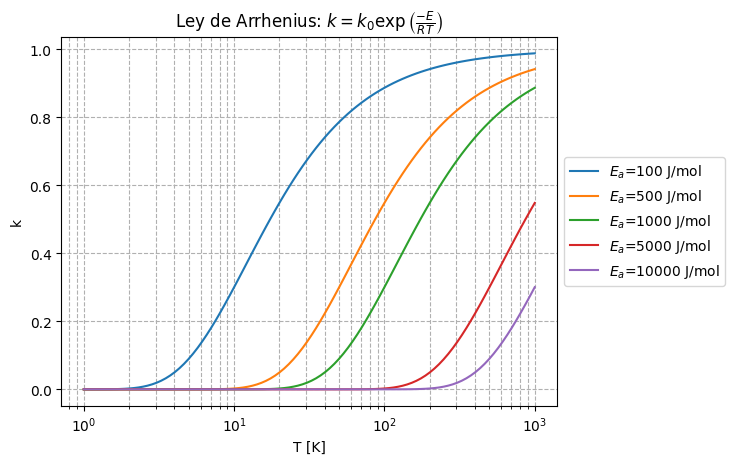

In [34]:
fig, ax = plt.subplots()
k0 = 1
E = [1e2, 5e2, 1e3, 5e3, 1e4]
T = np.logspace(0, 3, 100)
for e in E:
    ax.plot(T, kArrhenius(T, k0, e), label=f"$E_a$={str(int(e))} J/mol")
ax.set(
    xlabel='T [K]', 
    ylabel=r'k', 
    xscale='log'
)
ax.grid(ls='--', which='both')
ax.legend(loc='center left', bbox_to_anchor=[1, 0.5])
ax.set_title(r"Ley de Arrhenius: $k=k_0 \exp \left(\frac{-E}{RT}\right)$")
ax.grid(ls='--')
plt.show()

<div class="alert alert-success">

Considerando que la constante de reacción $k$ se puede interpretar como el número de colisiones por unidad de tiempo que resultan en una reacción química, se pueden enunciar los siguientes postulados tras observar el gráfico:

- El término pre-exponencial, $k_0$, se relaciona con el número de colisiones por unidad de tiempo que pueden o no, resultar en una reacción química.

- El término exponencial, $\exp\left(\frac{-E}{RT}\right)$, es la probabilidad de que una colisión dada resulte en una reacción.

    - La probabilidad aumenta al incrementar la temperatura, $T$, ya que a temperaturas muy altas se tiene: $k \rightarrow k_0$.
    - La probabilidad aumenta al disminuir la energía de activación, $E$, por ejemplo mediante el uso de catalizadores.

</div>

#### 2.3.3.2 Gráfico de Arrhenius

La energía de activación de una reacción, $E_{a}$, se puede determinar experimentalmente efectuando mediciones de la tasa de reacción a distintas temperaturas. Al aplicar logaritmo natural a la Ley de Arrhenius, se obtiene la ecuación:

$$\ln(k) = \ln(k_0) - \frac{E_a}{R} \left(\frac{1}{T}\right)$$

In [5]:
def gArrhenius(T, k0, E):
    R = 8.314 # J/(mol.K)
    return np.log(k0) - E/R*(1/T)

/tmp/ipykernel_8233/2057304530.py:11: RuntimeWarning: divide by zero encountered in divide
  inv_from_temp = lambda T: 1/T # convert temperature to inverse temperature


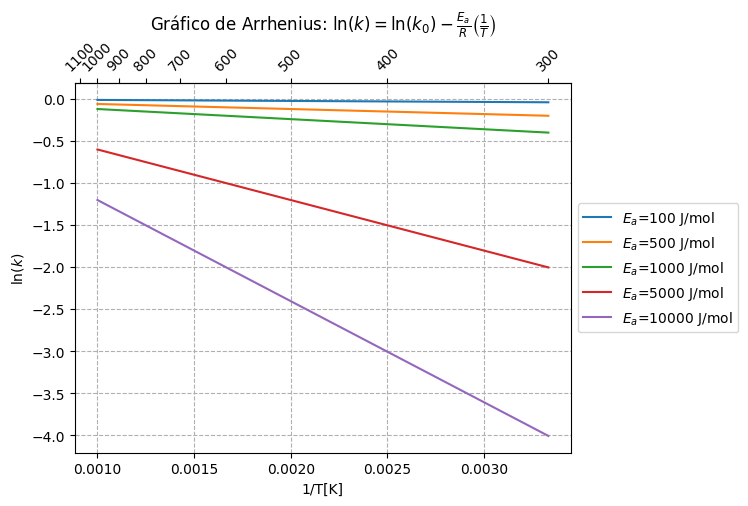

In [45]:
fig, ax = plt.subplots()
R = 8.314; k0 = 1
E = [1e2, 5e2, 1e3, 5e3, 1e4]
T = np.linspace(300, 1000, 100)
for e in E:
    ax.plot(1/T, gArrhenius(T, k0, e), label=f"$E_a$={str(int(e))} J/mol")
ax.set(
    xlabel='1/T[K]', 
    ylabel=r'$\ln(k)$'
)
inv_from_temp = lambda T: 1/T # convert temperature to inverse temperature 
ax2 = ax.secondary_xaxis("top", functions=(inv_from_temp, inv_from_temp))
#ax2.set(xlabel="T[K]")
ax2.tick_params("x", rotation=45)
ax.legend(loc='center left', bbox_to_anchor=[1, 0.5])
ax.set_title(r"Gráfico de Arrhenius: $\ln(k)=\ln(k_0) - \frac{E_a}{R} \left(\frac{1}{T}\right)$")
ax.grid(ls='--')
plt.show()

<div class="alert alert-success">

Se pueden enunciar los siguientes postulados tras observar el gráfico:

- La ordenada al origen corresponde al factor pre-exponencial, $k_0$.

- La pendiente de la línea recta de la gráfica corresponde al término $-\frac{E_a}{R}$.
    - A mayor energía de activación, la reacción es más sensible a la temperatura.

</div>

#### 2.3.3.3 Ejemplos de utilización de la Ley de Arrhenius

##### 2.3.3.3.1 Ejemplo: Estimación de la energía de activación de un proceso de pasteurización

Adaptado de: ***[Levenspiel, 1998, p. 29]***

En la Tabla debajo se muestra el tiempo requerido para pausterizar leche en función de la temperatura de calentamiento de la misma.

<center>

| $t \, [\mathrm{s}]$ | $T \, [\mathrm{K}]$ |
|:--------:|:--------:|
| 1800 | 336 |
| 15 | 347 |

</center>

Encuentre el valor de energía de activación para este proceso de esterilización, asumiendo que la dependencia con la temperatura es de tipo Arrhenius.

**Respuesta**

La ley de Arrhenius se expresa:

$$k  = k_0 \exp \left( \frac{-E_a}{RT} \right)$$

$$\ln(k) = \ln(k_0) - \frac{E_a}{R} \left(\frac{1}{T}\right)$$

Considerando concentración constante, y dos temperaturas distintas, se tiene:

$$\ln \left(\frac{r_{2}}{r_{1}}\right) = \ln \left(\frac{k_{2}}{k_{1}}\right) = \ln (k_2) - \ln(k_1) = \frac{E_a}{R} \left(\frac{1}{T_1} - \frac{1}{T_2} \right)$$

Ahora, considerando que la tasa de reacción es inversamente proporcional al tiempo de reacción:

$$r \propto \frac{1}{t}$$

$$\ln \left(\frac{r_{2}}{r_{1}}\right) = \ln \left(\frac{t_{1}}{t_{2}}\right) = \frac{E_a}{R} \left(\frac{1}{T_1} - \frac{1}{T_2} \right)$$

Sustituyendo valores en la ecuación se tiene:

$$\ln \left(\frac{1800}{15} \right) = \frac{E_a}{8.314} \left(\frac{1}{336} - \frac{1}{347}\right)$$



<div class="alert alert-success">
Manipulando la ecuación, se obtiene el estimado de la energía de activación:

$$E_a \approx 421885 \quad [\mathrm{J.mol^{-1}}]$$

</div>

##### 2.3.3.3.2 Ejemplo: Estimación de la energía de activación a partir de datos de la constante de reacción

Adaptado de: ***[Fogler, 2016, p. 91]***

La descomposición del cloruro de bencenodiazonio en clorobenceno y nitrógeno es una reacción de primer orden:

$$\mathrm{C_6H_5N_2Cl \longrightarrow C_6H_5Cl + {N_2}_{(g)}}$$

Utilizando la información provista en la Tabla debajo, calcule la energía de activación para esta reacción.

<center>

| $$k \, [\mathrm{s^{-1}}]$$ | $$T \, [\mathrm{K}]$$ |
|:----:|:----:|
| 0.00043 | 313.0 |
| 0.00103 | 319.0 |
| 0.00180 | 323.0 |
| 0.00355 | 328.0 |
| 0.00717 | 333.0 |

</center>

**Respuesta**

In [7]:
k = 1e-5 * np.array([43, 103, 180, 355, 717])
T = np.array([313, 319, 323, 328, 333])
R = 8.314

In [8]:
## Alternativa 1: efectuar un ajuste a un polinomio de primer orden con numpy.polyfit()
res1 = np.polyfit(1/T, np.log(k), deg=1)
Ea1_R = -res1[0]; lnk01 = res1[1]
Ea1 = Ea1_R*R;  k01 = np.exp(lnk01) # energía de activación y factor pre-exponencial

print("Ajuste Ley de Arrhenius:")
print(f"ln(k)=-{Ea1_R}/T + {lnk01}")
print(f"Energía de activación: {np.round(Ea1, decimals=2)} [J.mol-1]")
print(f"Factor pre-exponencial: {np.round(k01, decimals=2)} [J.mol-1]")

Ajuste Ley de Arrhenius:
ln(k)=-14611.680228306064/T + 38.924580435181376
Energía de activación: 121481.51 [J.mol-1]
Factor pre-exponencial: 8.03027639187992e+16 [J.mol-1]


In [9]:
## Alternativa 2: Ajustar directamente la ley de Arrhenius con scipy.optimize.curve_fit
res2 = curve_fit(gArrhenius, xdata=T, ydata=np.log(k))
Ea2 = res2[0][1]; k02 = res2[0][0] # energía de activación y factor pre-exponencial
Ea2_R = Ea2/R; lnk02 = np.log(k02)

print("Ajuste Ley de Arrhenius:")
print(f"ln(k)=-{Ea2_R}/T + {lnk02}")
print(f"Energía de activación: {np.round(Ea2, decimals=2)} [J.mol-1]")
print(f"Factor pre-exponencial: {np.round(k02, decimals=2)} [J.mol-1]")

Ajuste Ley de Arrhenius:
ln(k)=-14611.680215926073/T + 38.92458039685741
Energía de activación: 121481.51 [J.mol-1]
Factor pre-exponencial: 8.030276084127846e+16 [J.mol-1]


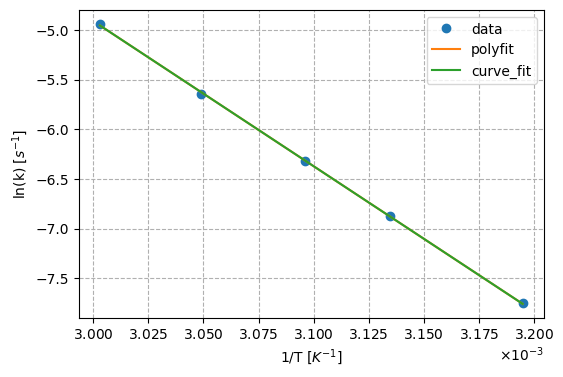

In [10]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(1/T, np.log(k), ls='', marker='o', label='data')
ax.plot(1/T, -Ea1_R/T + lnk01, label='polyfit')
ax.plot(1/T, -Ea2_R/T + lnk02, label='curve_fit')

ax.set(xlabel=r'1/T [$K^{-1}$]', ylabel=r'ln(k) [$s^{-1}$]')
formatter = mpl.ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1, 1))
ax.xaxis.set_major_formatter(formatter)
ax.legend()
ax.grid(ls='--')
plt.show()

# Referencias

- ***[Fogler, 2016]***: Fogler, H. S. (2016) Elements of Chemical Reaction Engineering (5th ed.). Prentice Education Inc.

- ***[Levenspiel, 1998]***: Levenspiel, O. (1998) Chemical Reaction Engineering (3rd ed.). John Wiley & Sons Inc. URL: https://www.wiley.com/en-no/Chemical+Reaction+Engineering%2C+3rd+Edition-p-9780471254249